<a href="https://colab.research.google.com/github/shayanmazhar/Build-and-Deploy-Ecommerce-Website/blob/main/Cseeresearch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn numpy

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shayanmazharali","key":"7ab1b9865f26077c778382788a0402d2"}'}

In [3]:
# Make a directory for the Kaggle API key
!mkdir ~/.kaggle

# Copy kaggle.json into the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the required permissions for the API key file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d naserabdullahalam/phishing-email-dataset

Dataset URL: https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset
License(s): CC-BY-SA-4.0
 84% 65.0M/77.1M [00:00<00:00, 93.0MB/s]
100% 77.1M/77.1M [00:00<00:00, 86.1MB/s]


In [5]:
!unzip phishing-email-dataset.zip

Archive:  phishing-email-dataset.zip
  inflating: CEAS_08.csv             
  inflating: Enron.csv               
  inflating: Ling.csv                
  inflating: Nazario.csv             
  inflating: Nigerian_Fraud.csv      
  inflating: SpamAssasin.csv         
  inflating: phishing_email.csv      


In [6]:
!ls

CEAS_08.csv  kaggle.json  Nazario.csv	      phishing_email.csv	  sample_data
Enron.csv    Ling.csv	  Nigerian_Fraud.csv  phishing-email-dataset.zip  SpamAssasin.csv


In [10]:
# Load datasets into DataFrames
df_enron = pd.read_csv('/content/Enron.csv')
df_ling = pd.read_csv('/content/Ling.csv')
df_ceas = pd.read_csv('/content/CEAS_08.csv')
df_nazario = pd.read_csv('/content/Nazario.csv')
df_fraud = pd.read_csv('/content/Nigerian_Fraud.csv')
df_spamassassin = pd.read_csv('/content/SpamAssasin.csv')
df_phishing = pd.read_csv('/content/phishing_email.csv')

# Merge Enron and Ling datasets
df_enron_ling = pd.concat([df_enron, df_ling], ignore_index=True)

# Merge CEAS, Nazario, Fraud, and SpamAssassin datasets
df_ceas_nazario_fraud_spam = pd.concat([df_ceas, df_nazario, df_fraud, df_spamassassin], ignore_index=True)

  # Drop rows with missing labels (if any)
df_enron_ling.dropna(subset=['label'], inplace=True)
df_ceas_nazario_fraud_spam.dropna(subset=['label'], inplace=True)
df_ceas_nazario_fraud_spam.dropna(subset=['body'], inplace=True)
df_phishing.dropna(subset=['label'], inplace=True)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all datasets for consistent vectorization
combined_texts = df_enron_ling['body'].tolist() + df_ceas_nazario_fraud_spam['body'].tolist() + df_phishing['text_combined'].tolist()

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the combined text data
vectorizer.fit(combined_texts)

# Transform each dataset using the vectorizer
X_train_enron_ling = vectorizer.transform(df_enron_ling['body'])
X_train_ceas_nazario_fraud_spam = vectorizer.transform(df_ceas_nazario_fraud_spam['body'])
X_test_phishing = vectorizer.transform(df_phishing['text_combined'])

# Labels (assuming your datasets have a 'label' column where 1 = phishing, 0 = non-phishing)
y_train_enron_ling = df_enron_ling['label']
y_train_ceas_nazario_fraud_spam = df_ceas_nazario_fraud_spam['label']
y_test_phishing = df_phishing['label']


In [13]:
# Train Logistic Regression on Enron + Ling dataset
logreg_enron_ling = LogisticRegression(max_iter=1000)
logreg_enron_ling.fit(X_train_enron_ling, y_train_enron_ling)

# Train Logistic Regression on CEAS + Nazario + Fraud + SpamAssassin dataset
logreg_ceas_nazario_fraud_spam = LogisticRegression(max_iter=1000)
logreg_ceas_nazario_fraud_spam.fit(X_train_ceas_nazario_fraud_spam, y_train_ceas_nazario_fraud_spam)


LogisticRegression(max_iter=1000)

In [14]:
# Train Random Forest on Enron + Ling dataset
rf_enron_ling = RandomForestClassifier(n_estimators=100)
rf_enron_ling.fit(X_train_enron_ling, y_train_enron_ling)

# Train Random Forest on CEAS + Nazario + Fraud + SpamAssassin dataset
rf_ceas_nazario_fraud_spam = RandomForestClassifier(n_estimators=100)
rf_ceas_nazario_fraud_spam.fit(X_train_ceas_nazario_fraud_spam, y_train_ceas_nazario_fraud_spam)


RandomForestClassifier()

In [15]:
# Predict with Logistic Regression models
y_pred_enron_ling_logreg = logreg_enron_ling.predict(X_test_phishing)
y_pred_ceas_nazario_fraud_spam_logreg = logreg_ceas_nazario_fraud_spam.predict(X_test_phishing)

# Accuracy
accuracy_enron_ling_logreg = accuracy_score(y_test_phishing, y_pred_enron_ling_logreg)
accuracy_ceas_nazario_fraud_spam_logreg = accuracy_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_logreg)

# Precision, Recall, F1 Score
precision_enron_ling_logreg = precision_score(y_test_phishing, y_pred_enron_ling_logreg)
recall_enron_ling_logreg = recall_score(y_test_phishing, y_pred_enron_ling_logreg)
f1_enron_ling_logreg = f1_score(y_test_phishing, y_pred_enron_ling_logreg)

precision_ceas_nazario_fraud_spam_logreg = precision_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_logreg)
recall_ceas_nazario_fraud_spam_logreg = recall_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_logreg)
f1_ceas_nazario_fraud_spam_logreg = f1_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_logreg)

# Print the results
print(f"Logistic Regression (Enron + Ling) Accuracy: {accuracy_enron_ling_logreg}")
print(f"Logistic Regression (Enron + Ling) Precision: {precision_enron_ling_logreg}")
print(f"Logistic Regression (Enron + Ling) Recall: {recall_enron_ling_logreg}")
print(f"Logistic Regression (Enron + Ling) F1 Score: {f1_enron_ling_logreg}\n")

print(f"Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Accuracy: {accuracy_ceas_nazario_fraud_spam_logreg}")
print(f"Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Precision: {precision_ceas_nazario_fraud_spam_logreg}")
print(f"Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Recall: {recall_ceas_nazario_fraud_spam_logreg}")
print(f"Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) F1 Score: {f1_ceas_nazario_fraud_spam_logreg}\n")


Logistic Regression (Enron + Ling) Accuracy: 0.7808476589966782
Logistic Regression (Enron + Ling) Precision: 0.7045671887881286
Logistic Regression (Enron + Ling) Recall: 0.9962929285864167
Logistic Regression (Enron + Ling) F1 Score: 0.8254121555712229

Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Accuracy: 0.8788885386611062
Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Precision: 0.8208664105014726
Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) Recall: 0.9812081788720244
Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin) F1 Score: 0.8939039932030586



In [16]:
# Predict with Random Forest models
y_pred_enron_ling_rf = rf_enron_ling.predict(X_test_phishing)
y_pred_ceas_nazario_fraud_spam_rf = rf_ceas_nazario_fraud_spam.predict(X_test_phishing)

# Accuracy
accuracy_enron_ling_rf = accuracy_score(y_test_phishing, y_pred_enron_ling_rf)
accuracy_ceas_nazario_fraud_spam_rf = accuracy_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_rf)

# Precision, Recall, F1 Score
precision_enron_ling_rf = precision_score(y_test_phishing, y_pred_enron_ling_rf)
recall_enron_ling_rf = recall_score(y_test_phishing, y_pred_enron_ling_rf)
f1_enron_ling_rf = f1_score(y_test_phishing, y_pred_enron_ling_rf)

precision_ceas_nazario_fraud_spam_rf = precision_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_rf)
recall_ceas_nazario_fraud_spam_rf = recall_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_rf)
f1_ceas_nazario_fraud_spam_rf = f1_score(y_test_phishing, y_pred_ceas_nazario_fraud_spam_rf)

# Print the results
print(f"Random Forest (Enron + Ling) Accuracy: {accuracy_enron_ling_rf}")
print(f"Random Forest (Enron + Ling) Precision: {precision_enron_ling_rf}")
print(f"Random Forest (Enron + Ling) Recall: {recall_enron_ling_rf}")
print(f"Random Forest (Enron + Ling) F1 Score: {f1_enron_ling_rf}\n")

print(f"Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Accuracy: {accuracy_ceas_nazario_fraud_spam_rf}")
print(f"Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Precision: {precision_ceas_nazario_fraud_spam_rf}")
print(f"Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Recall: {recall_ceas_nazario_fraud_spam_rf}")
print(f"Random Forest (CEAS + Nazario + Fraud + SpamAssassin) F1 Score: {f1_ceas_nazario_fraud_spam_rf}\n")

Random Forest (Enron + Ling) Accuracy: 0.8474529010983682
Random Forest (Enron + Ling) Precision: 0.7991550852811118
Random Forest (Enron + Ling) Recall: 0.9438343708470308
Random Forest (Enron + Ling) F1 Score: 0.8654900745080013

Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Accuracy: 0.8769609388259826
Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Precision: 0.8488535629048756
Random Forest (CEAS + Nazario + Fraud + SpamAssassin) Recall: 0.9287496211326386
Random Forest (CEAS + Nazario + Fraud + SpamAssassin) F1 Score: 0.8870060900254957



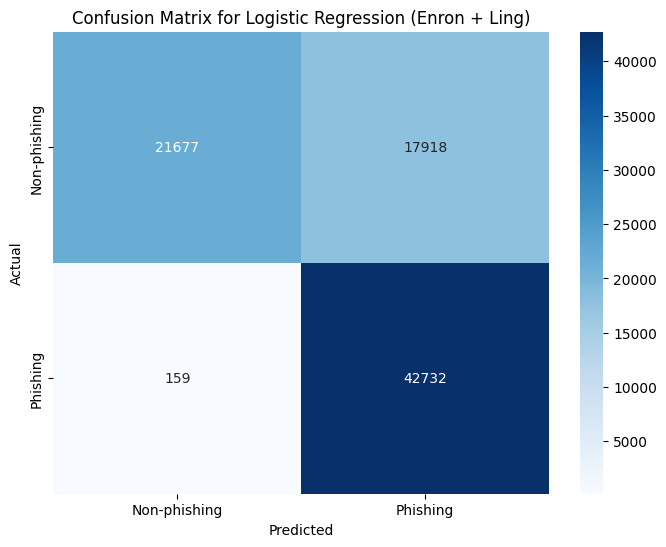

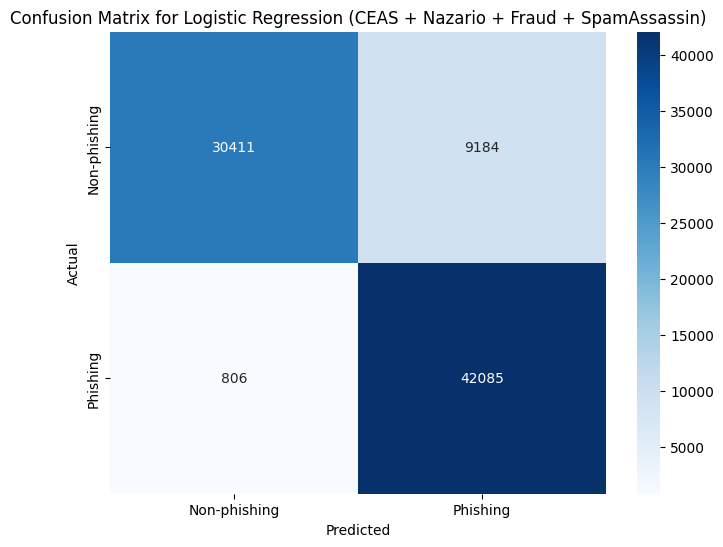

In [18]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression (Enron + Ling)
cm_logreg_enron_ling = confusion_matrix(y_test_phishing, y_pred_enron_ling_logreg)

# Confusion Matrix for Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin)
cm_logreg_ceas_nazario_fraud_spam = confusion_matrix(y_test_phishing, y_pred_ceas_nazario_fraud_spam_logreg)

# Plot Confusion Matrix for Logistic Regression (Enron + Ling)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_enron_ling, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-phishing', 'Phishing'], yticklabels=['Non-phishing', 'Phishing'])
plt.title('Confusion Matrix for Logistic Regression (Enron + Ling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_ceas_nazario_fraud_spam, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-phishing', 'Phishing'], yticklabels=['Non-phishing', 'Phishing'])
plt.title('Confusion Matrix for Logistic Regression (CEAS + Nazario + Fraud + SpamAssassin)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


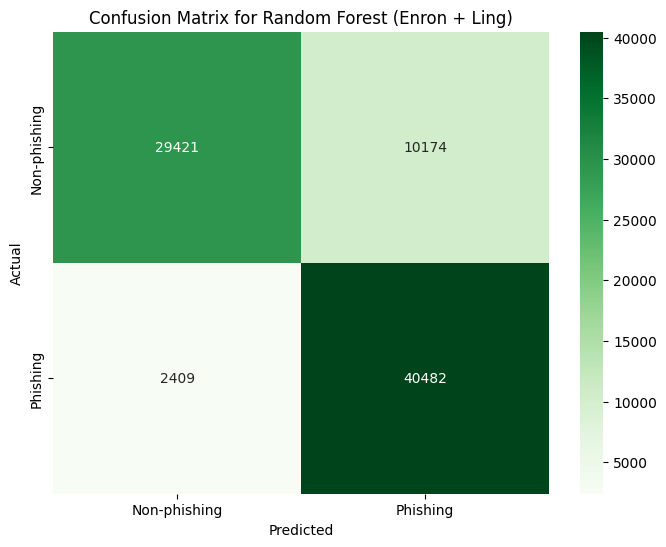

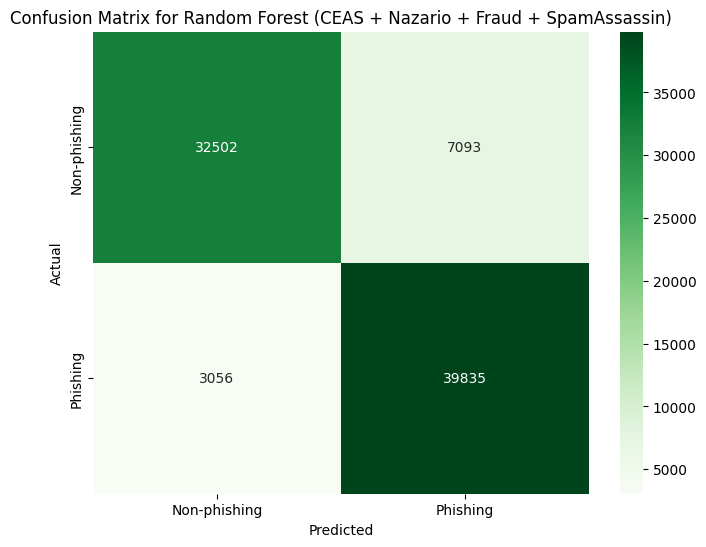

In [19]:
# Confusion Matrix for Random Forest (Enron + Ling)
cm_rf_enron_ling = confusion_matrix(y_test_phishing, y_pred_enron_ling_rf)

# Confusion Matrix for Random Forest (CEAS + Nazario + Fraud + SpamAssassin)
cm_rf_ceas_nazario_fraud_spam = confusion_matrix(y_test_phishing, y_pred_ceas_nazario_fraud_spam_rf)

# Plot Confusion Matrix for Random Forest (Enron + Ling)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_enron_ling, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-phishing', 'Phishing'], yticklabels=['Non-phishing', 'Phishing'])
plt.title('Confusion Matrix for Random Forest (Enron + Ling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Random Forest (CEAS + Nazario + Fraud + SpamAssassin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_ceas_nazario_fraud_spam, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-phishing', 'Phishing'], yticklabels=['Non-phishing', 'Phishing'])
plt.title('Confusion Matrix for Random Forest (CEAS + Nazario + Fraud + SpamAssassin)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()